# Exploratory Data Analysis for Sweden Auto Insurance dataset


Author: Anuj Khandelwal(@anujonthemove)

## Dataset Feature overview

Auto Insurance in Sweden

In the following data,
- X = number of claims
- Y = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as stats

## Load data

In [2]:
# Load data using pandas read_csv helper
data = pd.read_csv('../datasets/regression/univariate-regression/auto-insurance-data/auto_insurance_sweden.csv', sep=','
                 , names=['num_claims', 'total_payment'], skiprows=1)
print('Dataset Shape', data.shape)
data.head()

('Dataset Shape', (63, 2))


,num_claims,total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


This dataset contains a total of 63 rows(observations) and 2 columns(features) including the target variable 'total payment'. It is clear from the above that both variables are continuous.

## Checking column types
It's important to understand the column types because a machine learning model can not use categorical variables. Categorical variables need to be encoded as numbers before being used by the model.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
num_claims       63 non-null int64
total_payment    63 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


All the columns have either integer or float datatype which indicates that they are all numeric. 

## Check for missing data
Now we check for missing values in our data.

In [4]:
missing_values = data.isnull().sum().sum()
print('Missing values', missing_values)

('Missing values', 0)


This is a standard dataset, it is very clean and it doesn't contain missing values. In real datasets this is usually not the case, therefore it's important to check for missing values and correct them by either dropping or imputing values.

## Examining the distribution and summary statistics for both predictor and target variable
We can look at the distribution plot and summary statistics generated by pandas to easily check for outliers and anomalies in our data. 

,num_claims,total_payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


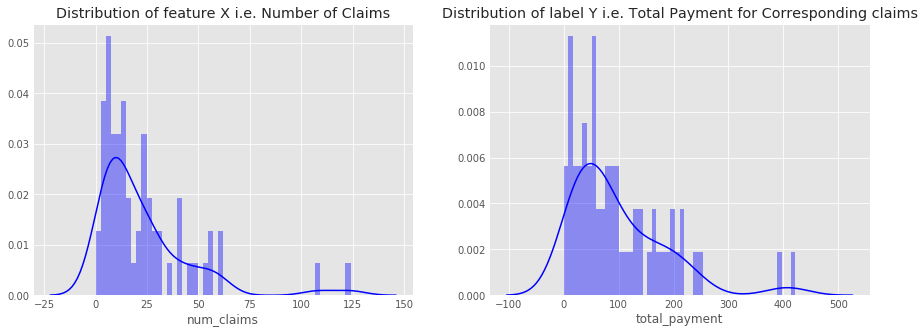

In [5]:
fig = plt.figure(1, figsize=(12, 10))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(data['num_claims'], bins=50, ax=ax1, color="blue")

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(data['total_payment'], bins=50, ax=ax2, color="blue")
data.describe()

Looking at the distribution, it can be seen both the predictor and the target variable are right-skewed and there are a few outliers on the higher end of both variables

This also explains some kind of positive correlation between the predictor variable (X) and the target (y) but we'd need to separately confirm that later.

## Using stripper and violen plot -  an alternate approach for distribution analysis

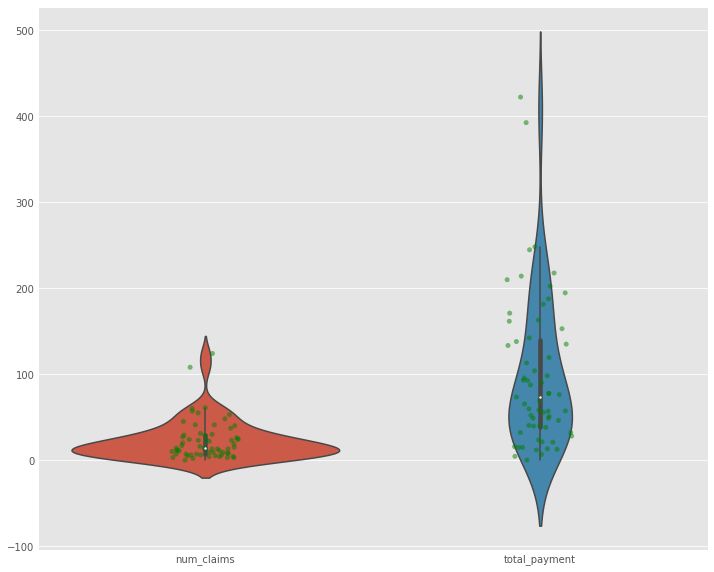

In [6]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))

# Create an axes instance
ax = fig.add_subplot(111)
ax = sns.stripplot(color='green', data=data, jitter=True, alpha=0.5)
ax = sns.violinplot(data=data)

## Using box plot -  another approach for distribution analysis

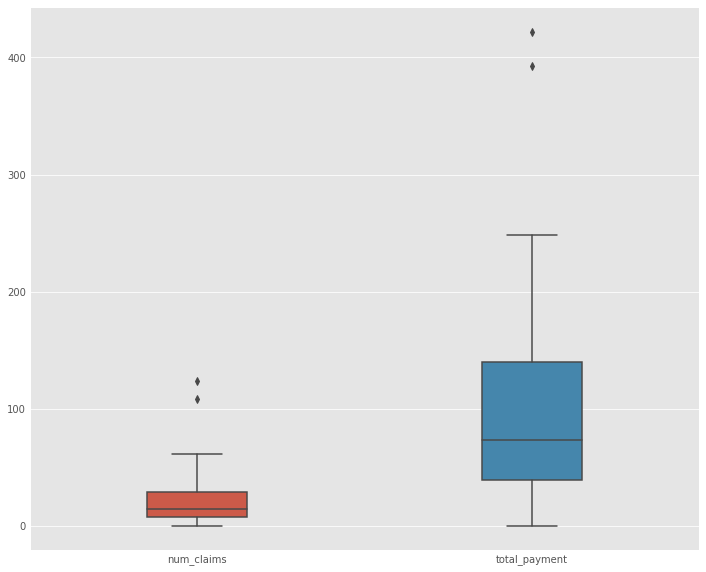

In [7]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot - matplotlib
# bp = ax.boxplot(data.values, labels=['num_claims', 'total_payment'])

# Save the figure, if needed
# fig.savefig('fig1.png', bbox_inches='tight')

# Create the boxplot - pandas
# pd.options.display.mpl_style = 'default'
# data.boxplot(figsize=(12,10));

ax = sns.boxplot(data=data, width=0.3)

## Correlations
It's important to look at correlations between features and the target. It reveals the impact of features on the target variable. Here, we calculate Pearson correlation. 

In [8]:
correlations = data.corr()['total_payment']
print(correlations)

num_claims       0.912878
total_payment    1.000000
Name: total_payment, dtype: float64


From the above statistics that total payments is highly correlated with the number of claims with a value of 0.91

## Plot to see the effect of number of claims on total payment - validate correlations
Using lmplot, we can visualize and validate the above statistic about Correlation

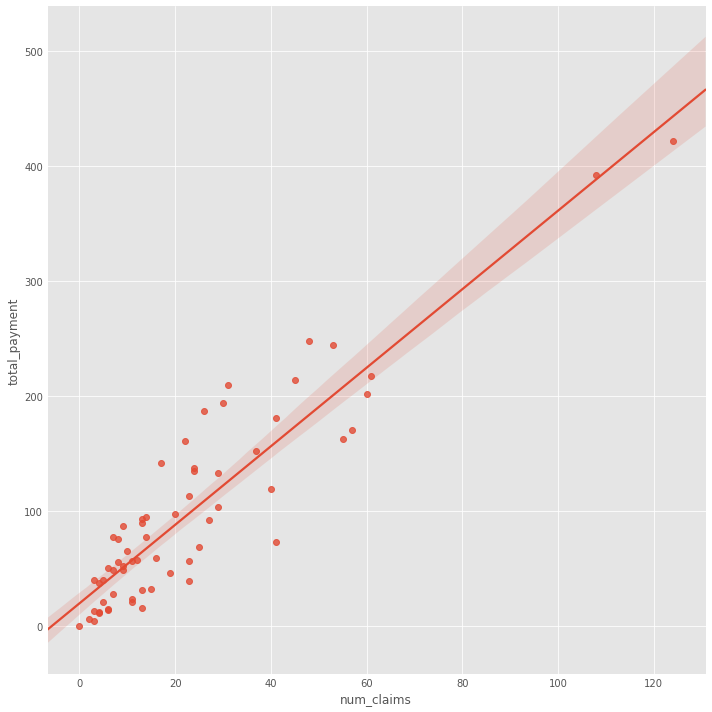

In [9]:
sns.lmplot(x='num_claims', y='total_payment', data=data, size=10, aspect=(12/10), palette="Set1");

#### Interpretation
In the plot above, it is clear that both the predictor variable and the target variable are positively correlated and share a linear relationship. We can now proceed to build a linear model on this dataset.

### That's all folks!